In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import re
import nltk
from contractions import fix

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
file_path = 'drug_reviews.csv'
data = pd.read_csv(file_path)

In [ ]:
# Inspect data
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0                161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB
None
                           drugName                     condition  \
0  206461                 Valsartan  Left Ventricular Dysfunction   
1   95260                Guanfacine                          ADHD   
2   92703                    Lybrel                 Birth Control   
3  138000                Ortho Evra                 Birth Control   
4   35696  Buprenorphine / naloxone             Opiate Dependence   

                     

In [ ]:
data = data.head(10500)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0                10500 non-null  int64  
 1   drugName     10500 non-null  object 
 2   condition    10440 non-null  object 
 3   review       10500 non-null  object 
 4   rating       10500 non-null  float64
 5   date         10500 non-null  object 
 6   usefulCount  10500 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 574.3+ KB


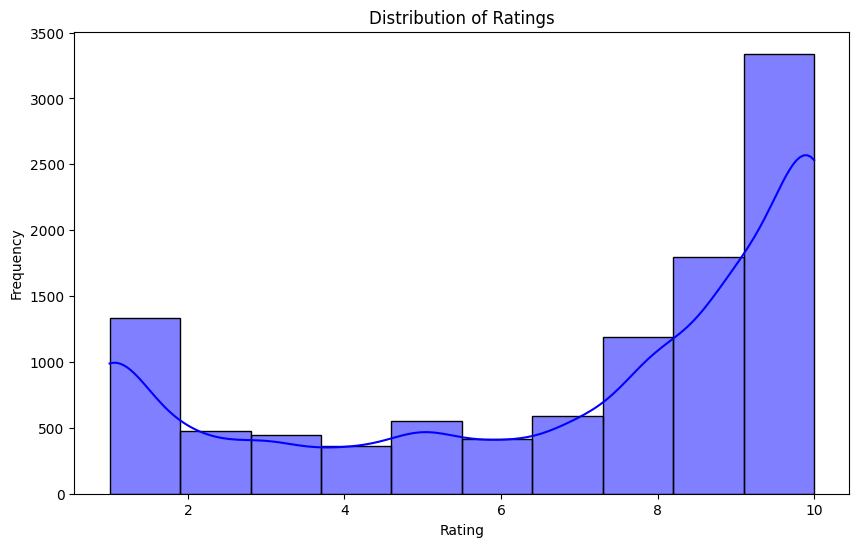

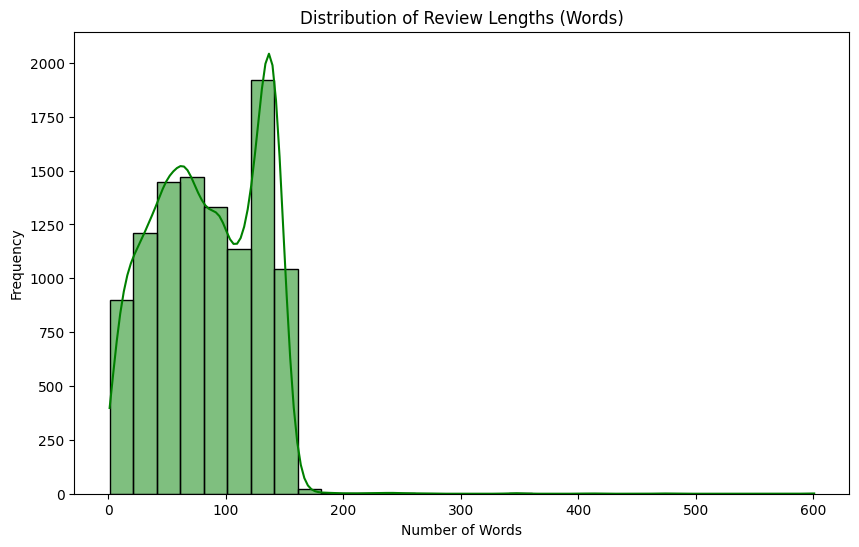

In [ ]:
#Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=10, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#Review Length Distribution
data['review_length'] = data['review'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Review Lengths (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# 'date' column in datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date'])

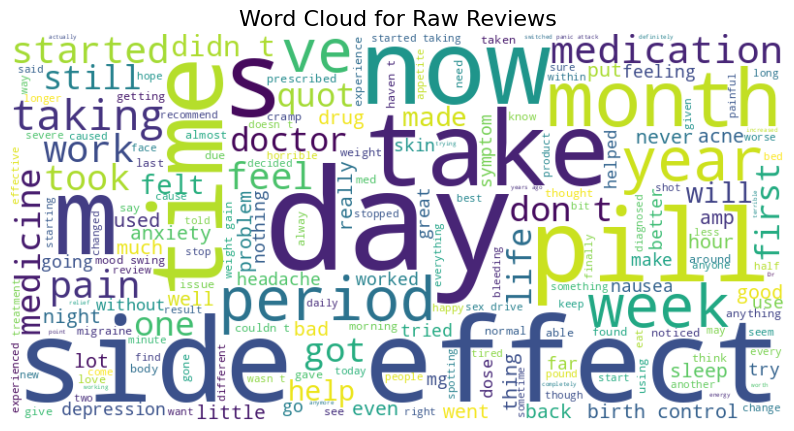

In [ ]:
# Word Clouds
# Generate word clouds using raw reviews
raw_reviews = ' '.join(data['review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(raw_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Raw Reviews', fontsize=16)
plt.show()

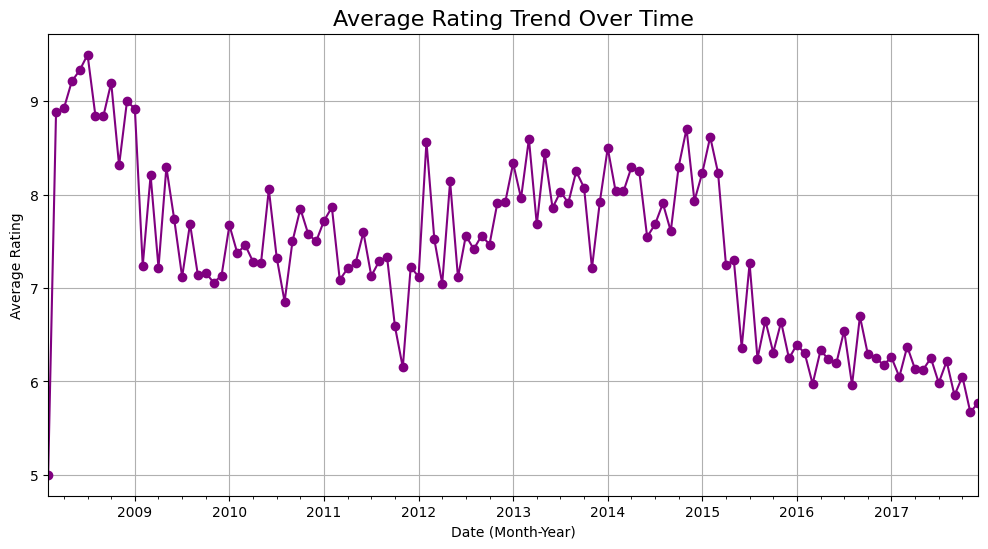

In [ ]:
# Trends over time
average_rating_trend = data.groupby(data['date'].dt.to_period('M'))['rating'].mean()
plt.figure(figsize=(12, 6))
average_rating_trend.plot(kind='line', marker='o', color='purple')
plt.title('Average Rating Trend Over Time', fontsize=16)
plt.xlabel('Date (Month-Year)')
plt.ylabel('Average Rating')
plt.grid()
plt.show()

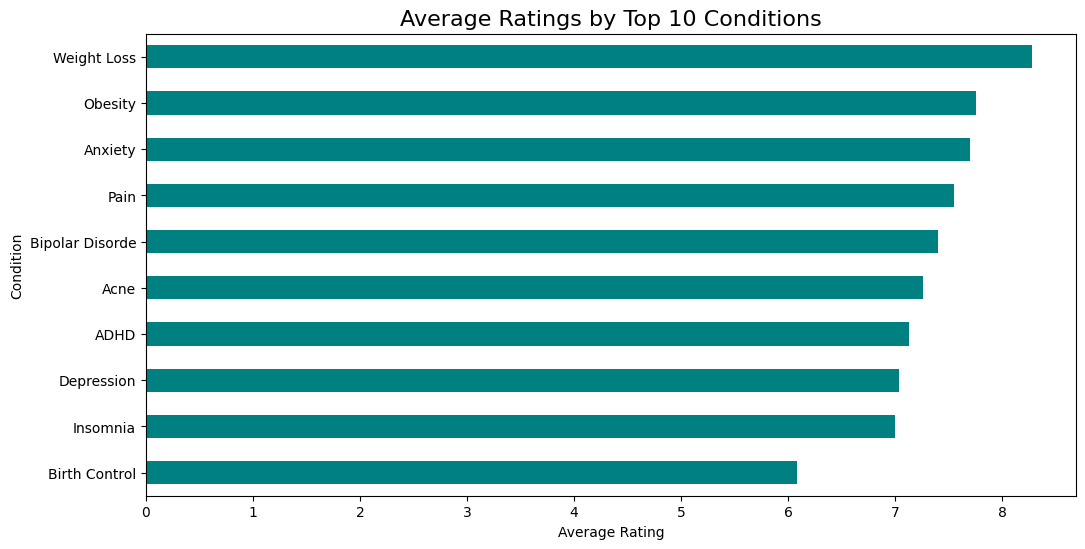

In [ ]:
# Average Ratings by Top 10 Conditions
top_conditions = data['condition'].value_counts().head(10).index
top_condition_data = data[data['condition'].isin(top_conditions)]
average_ratings_by_condition = top_condition_data.groupby('condition')['rating'].mean().sort_values()

plt.figure(figsize=(12, 6))
average_ratings_by_condition.plot(kind='barh', color='teal')
plt.title('Average Ratings by Top 10 Conditions', fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Condition')
plt.show()

In [ ]:
# Text Pre-processing
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Removing special characters
    text = text.lower()  # Converting to lowercase
    text = fix(text) # Expand contractions
    text = word_tokenize(text)  # Word tokenizing
    text = [word for word in text if word not in stopwords.words('english')]  # Removing stopwords
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]  # Getting meaningful root words
    return ' '.join(text) # Joining the lemattized text

# Apply cleaning
data['cleaned_review'] = data['review'].astype(str).apply(clean_text)

In [ ]:
data['cleaned_review'].head()

,cleaned_review
0,side effect take combination bystolic mg fish oil
1,son halfway fourth week intuniv became concern...
2,used take another oral contraceptive pill cycl...
3,first time using form birth control glad went ...
4,suboxone completely turned life around feel he...


In [ ]:
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [ ]:
#POS Tagging
data['pos_tags'] = data['cleaned_review'].apply(lambda x: pos_tag(word_tokenize(x)))
data['pos_tags']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# TF-IDF features for the reviews
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(data['cleaned_review'])

# Function for recommending similar drugs within the same condition
def recommend_similar_drugs_with_condition(drug_name, data, top_n=5):

    # Condition associated with the given drug
    condition = data.loc[data['drugName'] == drug_name, 'condition'].values
    if len(condition) == 0:
        return f"Drug '{drug_name}' not found in the dataset."

    condition = condition[0]
    print(f"Condition for '{drug_name}': {condition}")

    # Filter drugs with same condition
    condition_data = data[data['condition'] == condition]

    if condition_data.shape[0] <= 1:
        return f"No other drugs found for the condition '{condition}'."

    condition_indices = condition_data.index

    # Reduced TF-IDF matrix for the filtered data
    condition_tfidf_matrix = tfidf_matrix[condition_indices]

    # Cosine similarity matrix for the filtered drugs
    similarity_matrix = cosine_similarity(condition_tfidf_matrix)

    drug_index = condition_data[condition_data['drugName'] == drug_name].index[0]
    condition_index_in_tfidf = list(condition_indices).index(drug_index)

    # Similarity scores for the input drug
    similarity_scores = list(enumerate(similarity_matrix[condition_index_in_tfidf]))

    # Sort drugs by similarity score
    similar_drugs = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Top N similar drugs
    top_similar_drugs = [
        (condition_data.iloc[i[0]]['drugName'], i[1])
        for i in similar_drugs[1:top_n+1]
    ]

    return pd.DataFrame(top_similar_drugs, columns=['Drug Name', 'Similarity Score'])


In [ ]:
# Example usage
drug_name = data['drugName'].iloc[34]
recommended_drugs = recommend_similar_drugs_with_condition(drug_name, data, top_n=5)
print(recommended_drugs)

Condition for 'Viberzi': Irritable Bowel Syndrome
      Drug Name  Similarity Score
0   Eluxadoline          0.343234
1   Dicyclomine          0.262571
2  Escitalopram          0.247251
3   Eluxadoline          0.219981
4       Viberzi          0.206654
